In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import unidecode
import time

from openpyxl import load_workbook
import basedosdados as bd

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
%%time

# Opção com query.
query = f'''
select * from basedosdados-staging.br_tse_eleicoes_staging.candidatos
where ano = 2020
'''
df_infos = bd.read_sql(query, billing_project_id='projeto-tse')

df_infos.head()

Downloading: 100%|██████████| 557568/557568 [04:51<00:00, 1914.41rows/s]


CPU times: user 52.1 s, sys: 1.52 s, total: 53.6 s
Wall time: 5min 5s


,tipo_eleicao,id_municipio,id_municipio_tse,id_candidato_bd,cpf,titulo_eleitoral,sequencial,numero,nome,nome_urna,numero_partido,sigla_partido,cargo,situacao,ocupacao,data_nascimento,idade,genero,instrucao,estado_civil,nacionalidade,sigla_uf_nascimento,municipio_nascimento,email,raca,ano,sigla_uf
0,eleicoes municipais 2020 - ap,1600303,6050,1139122,41591364272,001210852585,30000680372,16,Gianfranco Gusmão De Azevedo,Gianfranco,16,PSTU,prefeito,deferido,professor de ensino medio,1973-05-27,47,masculino,ensino superior completo,divorciado(a),brasileira,AP,Macapá,profgianfranco@gmailcom,parda,2020,AP
1,eleicoes municipais 2020 - ap,1600303,6050,1391547,61476161291,002831572500,30000680373,16,Jairo Palheta Da Silva Marques,Jairo,16,PSTU,vice-prefeito,deferido,agricultor,1978-12-05,42,masculino,ensino medio completo,casado(a),brasileira,AP,Macapá,pstuapoficial@gmailcom,parda,2020,AP
2,eleicoes municipais 2020 - ap,1600303,6050,1580496,78557127391,030010341198,30000708154,16123,Genival Cruz De Araújo,Genival Cruz,16,PSTU,vereador,deferido,motorista de veiculos de transporte coletivo de passageiros,1978-09-29,42,masculino,ensino superior completo,casado(a),brasileira,MA,Caxias,genivalpstu@yahoocombr,preta,2020,AP
3,eleicoes municipais 2020 - ap,1600303,6050,1796660,99308126287,045957661155,30000708155,16016,Alcileide Dos Santos De Souza,Leide,16,PSTU,vereador,deferido,outros,1984-03-01,37,feminino,ensino medio completo,casado(a),brasileira,MA,Lago Da Pedra,pstuapoficial@gmailcom,preta,2020,AP
4,eleicao ordinaria,1200401,1392,200789,02829921895,007610960132,10001154399,29029,Francisco Antônio Leite,Francisco Leite,29,PCO,vereador,deferido,aposentado (exceto servidor publico),1960-06-21,60,masculino,ensino superior completo,casado(a),brasileira,SP,São Paulo,cenpco2020@gmailcom,branca,2020,AC


In [5]:
df_infos.describe()

,ano
count,557568.00
mean,2020.00
std,0.00
min,2020.00
25%,2020.00
50%,2020.00
75%,2020.00
max,2020.00


# Perfis sociodemográficos dos candidatos

## Genero x Raça

In [37]:
df_infos.groupby('genero')['raca'].value_counts()

genero     raca    
feminino   branca       92629
           parda        70723
           preta        20125
           indigena       733
           amarela        697
masculino  branca      175418
           parda       149562
           preta        38569
           indigena      1483
           amarela       1263
Name: raca, dtype: int64

Text(0.5, 1.0, 'Candidatos da eleição de 2020 agrupados por gênero e raça.')

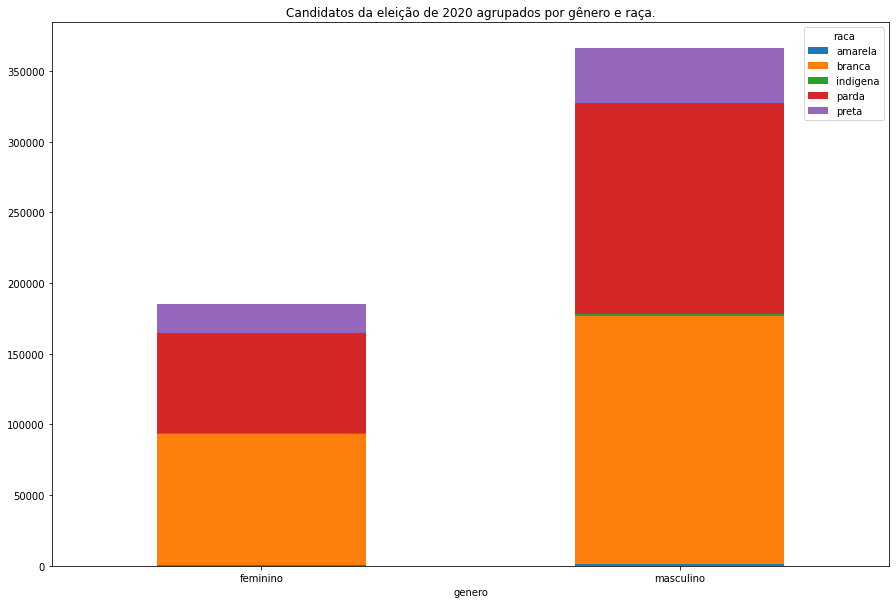

In [35]:
ax = df_infos.groupby('genero')['raca'].value_counts().unstack().plot(kind='bar', stacked=True)

plt.xticks(rotation=0)
plt.rcParams["figure.figsize"] = (15,10)
plt.title('Candidatos da eleição de 2020 agrupados por gênero e raça.')

In [75]:
atributo = 'raca'
d = []
soma = sum(df_infos[atributo].value_counts())
for key, value in df_infos[atributo].value_counts().items():
    proporcao = value/soma
    d.append([key, 100*proporcao, value])
#     print(f'{key}: {"{:.2%}".format(proporcao)}, valor absoluto: {value}')

pd.DataFrame(d, columns=[atributo, 'percentual(%)', 'valor absoluto'])

,raca,percentual(%),valor absoluto
0,branca,48.63,268047
1,parda,39.96,220285
2,preta,10.65,58694
3,indigena,0.40,2216
4,amarela,0.36,1960


Text(0.5, 1.0, 'Número de pessoas por raça.')

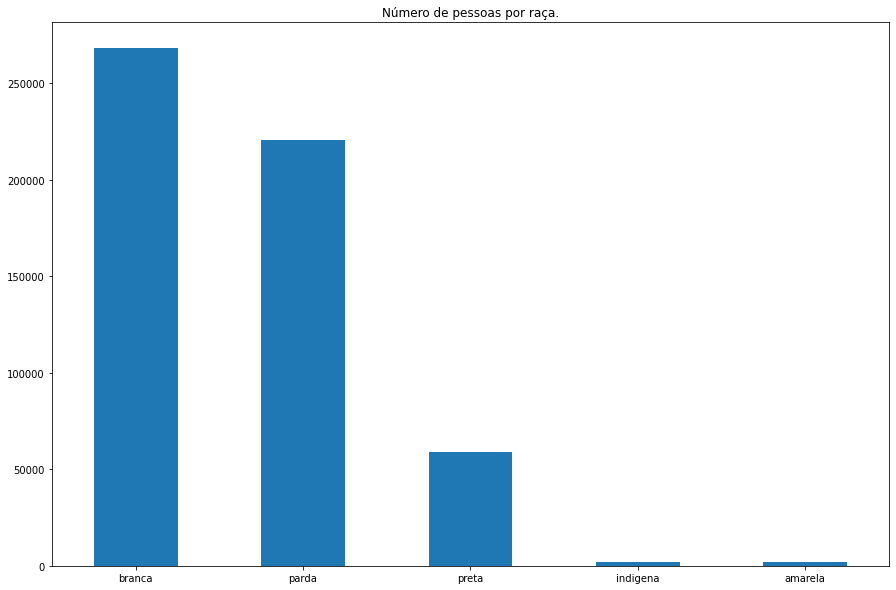

In [80]:
# ax = df_infos.groupby('genero')['raca'].value_counts().unstack().plot(kind='bar', stacked=True)
ax = df_infos['raca'].value_counts().plot(kind='bar', stacked=True)

plt.xticks(rotation=0)
# plt.rcParams["figure.figsize"] = (15,10)
plt.title('Número de pessoas por raça.')

## Instrução

In [36]:
df_infos['instrucao'].value_counts()

ensino medio completo            212401
ensino superior completo         135532
ensino fundamental incompleto     71252
ensino fundamental completo       68084
ensino medio incompleto           27688
ensino superior incompleto        24994
le e escreve                      17602
analfabeto                           15
Name: instrucao, dtype: int64

Text(0.5, 1.0, 'Instrução de cada candidato e gênero.')

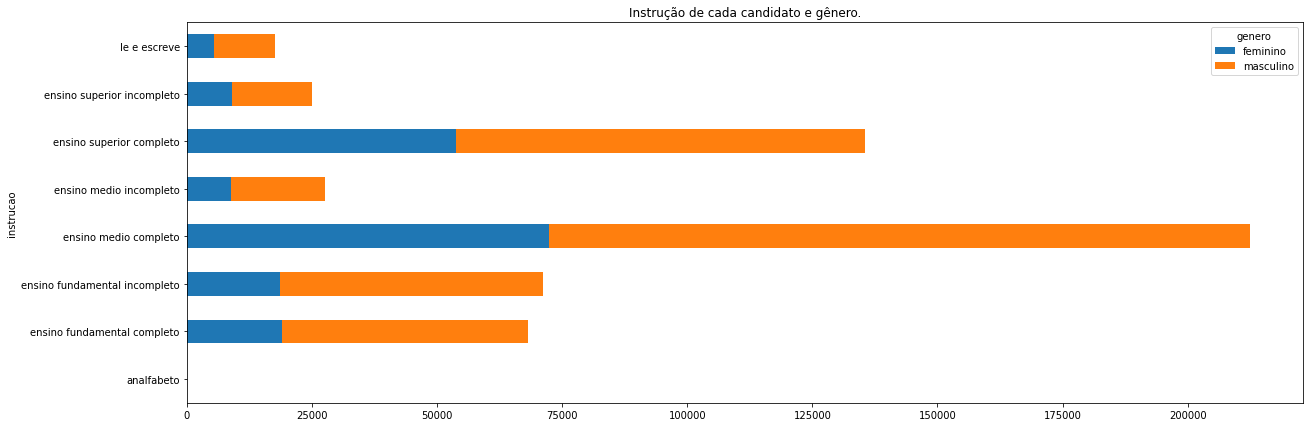

In [66]:
df_infos.groupby('instrucao')['genero'].value_counts().unstack().plot(kind='barh', stacked=True)

# plt.xticks(rotation=60)
plt.rcParams["figure.figsize"] = (15,10)
plt.title('Instrução de cada candidato e gênero.')

## Idade x gênero

In [46]:
df_infos.groupby('idade')['genero'].value_counts()

idade  genero   
100    feminino         1
17     feminino         1
       masculino        1
18     feminino       202
       masculino      162
19     feminino       719
       masculino      571
20     feminino       939
       masculino      867
21     feminino      1228
       masculino     1194
22     masculino     1499
       feminino      1337
23     masculino     1917
       feminino      1514
24     masculino     2159
       feminino      1754
25     masculino     2635
       feminino      2028
26     masculino     3090
       feminino      2242
27     masculino     3384
       feminino      2324
28     masculino     3882
       feminino      2510
29     masculino     4269
       feminino      2709
30     masculino     4883
       feminino      2942
31     masculino     5404
       feminino      3360
32     masculino     6609
       feminino      3685
33     masculino     7166
       feminino      3946
34     masculino     7721
       feminino      4438
35     masculino     

Text(0.5, 1.0, 'Distribuição de gêneros por idade.')

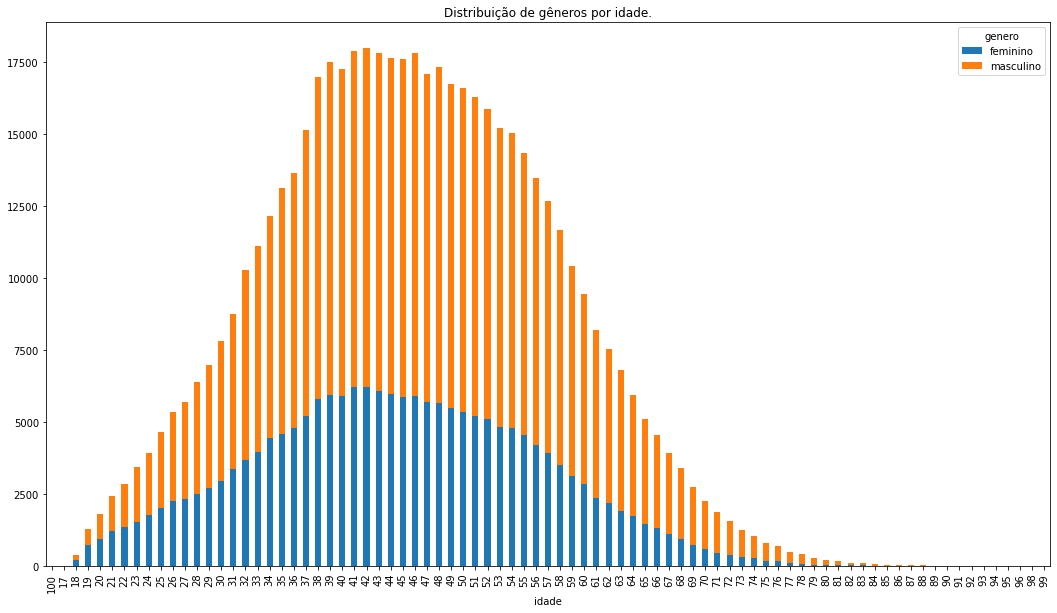

In [55]:
df_infos.groupby('idade')['genero'].value_counts().unstack().plot(kind='bar', stacked=True)

plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Distribuição de gêneros por idade.')

In [67]:
atributo = 'idade'
d = []
soma = sum(df_infos[atributo].value_counts())
for key, value in df_infos[atributo].value_counts().items():
    proporcao = value/soma
    d.append([key, 100*proporcao, value])
#     print(f'{key}: {"{:.2%}".format(proporcao)}, valor absoluto: {value}')

df_idade = pd.DataFrame(d, columns=[atributo, 'percentual(%)', 'valor absoluto'])
df_idade

,idade,percentual(%),valor absoluto
0,42,3.23,17984
1,41,3.21,17887
2,43,3.19,17810
3,46,3.19,17810
4,44,3.16,17632
5,45,3.16,17602
6,39,3.14,17494
7,48,3.11,17338
8,40,3.10,17259
9,47,3.07,17103


## Estado civil

In [72]:
atributo = 'estado_civil'
d = []
soma = sum(df_infos[atributo].value_counts())
for key, value in df_infos[atributo].value_counts().items():
    proporcao = value/soma
    d.append([key, 100*proporcao, value])
#     print(f'{key}: {"{:.2%}".format(proporcao)}, valor absoluto: {value}')

pd.DataFrame(d, columns=[atributo, 'percentual(%)', 'valor absoluto'])

,estado_civil,percentual(%),valor absoluto
0,casado(a),51.23,285653
1,solteiro(a),37.31,208043
2,divorciado(a),9.53,53153
3,viuvo(a),1.92,10719


Text(0.5, 1.0, 'Estado civil x gênero.')

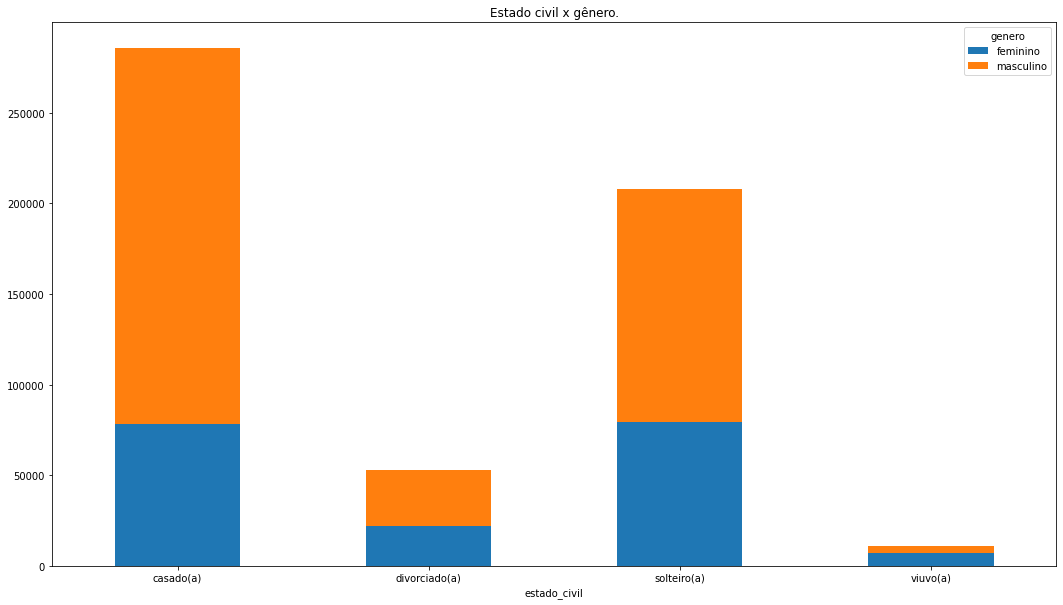

In [74]:
df_infos.groupby('estado_civil')['genero'].value_counts().unstack().plot(kind='bar', stacked=True)

plt.xticks(rotation=0)
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Estado civil x gênero.')

## Ocupação

In [83]:
atributo = 'ocupacao'
d = []
soma = sum(df_infos[atributo].value_counts())
for key, value in df_infos[atributo].value_counts().items():
    proporcao = value/soma
    d.append([key, 100*proporcao, value])
#     print(f'{key}: {"{:.2%}".format(proporcao)}, valor absoluto: {value}')

df_ocupacao = pd.DataFrame(d, columns=[atributo, 'percentual(%)', 'valor absoluto'])
df_ocupacao.head(15)

,ocupacao,percentual(%),valor absoluto
0,outros,21.40,119347
1,agricultor,6.83,38089
2,servidor publico municipal,6.37,35491
3,empresario,6.00,33445
4,comerciante,5.52,30778
5,vereador,4.45,24787
6,dona de casa,4.01,22334
7,aposentado (exceto servidor publico),3.49,19479
8,professor de ensino fundamental,2.27,12636
9,advogado,1.99,11079


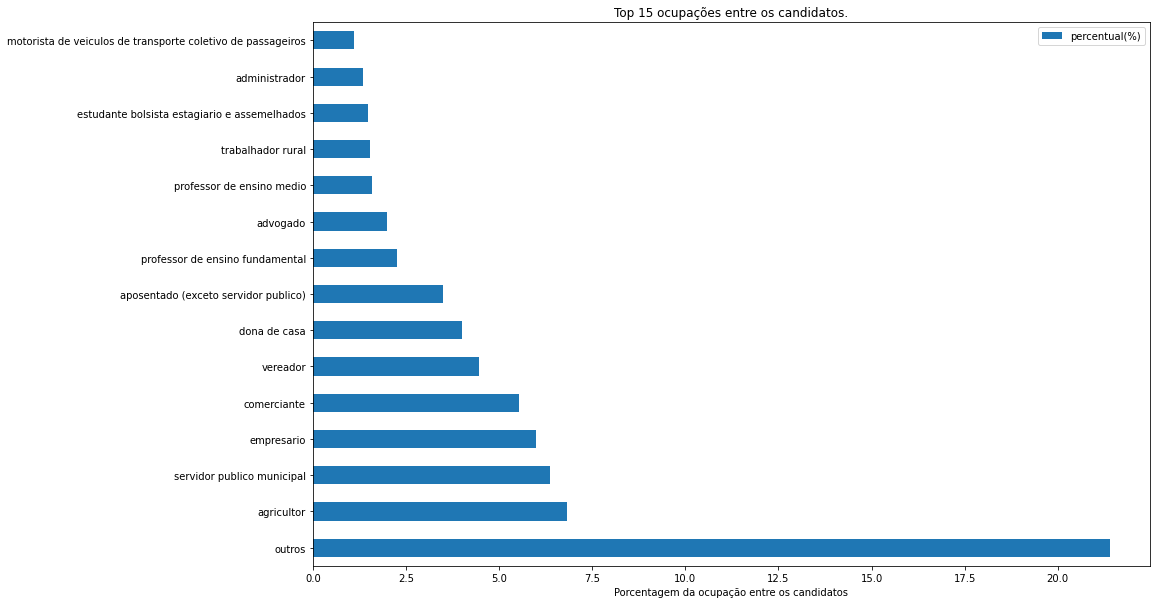

In [97]:
ax = df_ocupacao[['ocupacao','percentual(%)']].iloc[:15,:].plot(kind='barh')

ax.set_yticklabels(df_ocupacao['ocupacao'][:15])
# plt.xticks(rotation=45)
plt.xlabel('Porcentagem da ocupação entre os candidatos')
plt.title('Top 15 ocupações entre os candidatos.')
plt.show()

# Candidaturas femininas

In [99]:
df_mulheres = df_infos[df_infos['genero'] == 'feminino'].groupby(['ocupacao'])['raca'].value_counts()
df_mulheres.head()

ocupacao       raca    
administrador  branca      1290
               parda        672
               preta        158
               amarela        6
               indigena       4
Name: raca, dtype: int64

## Ocupações femininas

In [100]:
ocupacoes_fem = df_infos[
    df_infos['genero'] == 'feminino'
]['ocupacao'].value_counts()

atributo = 'ocupacao'
d = []
soma = sum(ocupacoes_fem)
for key, value in ocupacoes_fem.items():
    proporcao = value/soma
    d.append([key, 100*proporcao, value])

df_ocupacao_fem = pd.DataFrame(d, columns=[atributo, 'percentual(%)', 'valor absoluto'])
df_ocupacao_fem.head()

,ocupacao,percentual(%),valor absoluto
0,outros,22.40,41896
1,dona de casa,11.88,22224
2,servidor publico municipal,6.97,13041
3,agricultor,5.07,9485
4,professor de ensino fundamental,4.28,8013


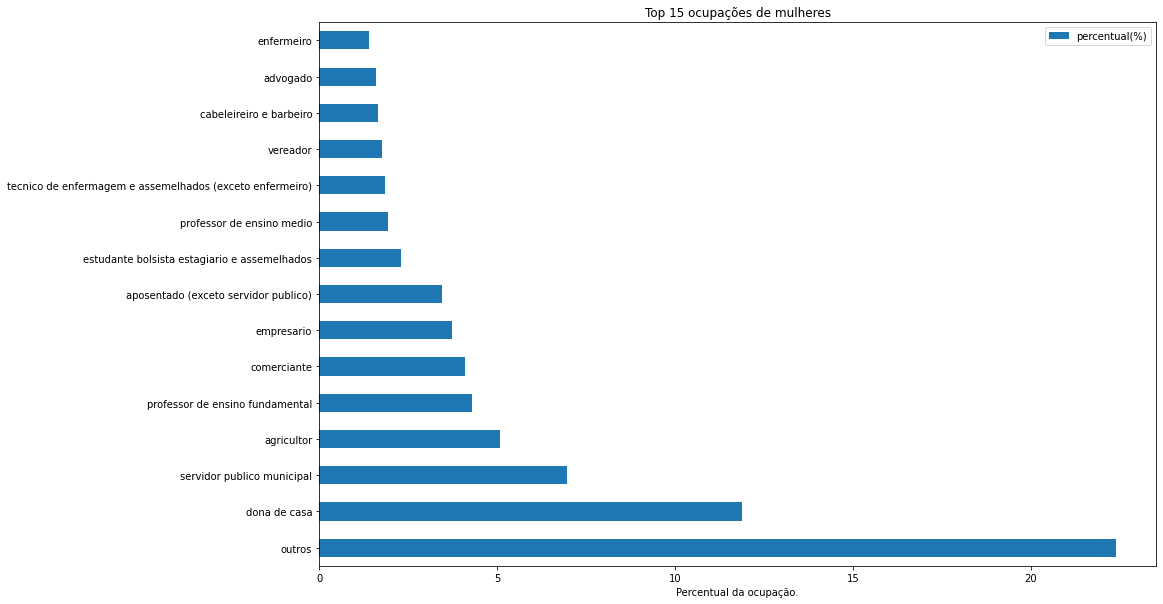

In [115]:
ax = df_ocupacao_fem.iloc[:15,:2].plot(kind='barh')

ax.set_yticklabels(df_ocupacao_fem.iloc[:15]['ocupacao'].to_list())
plt.title('Top 15 ocupações de mulheres')
plt.xlabel('Percentual da ocupação.')
plt.show()

Ocupações femininas que ocupam menos de 5% do total.

In [116]:
print('Ocupações de pessoas do genero feminino abaixo de 5% do total.')
df_ocupacao_fem[df_ocupacao_fem['percentual(%)'] < 5.0]

Ocupações de pessoas do genero feminino abaixo de 5% do total.


,ocupacao,percentual(%),valor absoluto
4,professor de ensino fundamental,4.28,8013
5,comerciante,4.11,7685
6,empresario,3.72,6958
7,aposentado (exceto servidor publico),3.45,6448
8,estudante bolsista estagiario e assemelhados,2.29,4284
9,professor de ensino medio,1.94,3629
10,tecnico de enfermagem e assemelhados (exceto enfermeiro),1.84,3442
11,vereador,1.76,3286
12,cabeleireiro e barbeiro,1.66,3112
13,advogado,1.59,2974


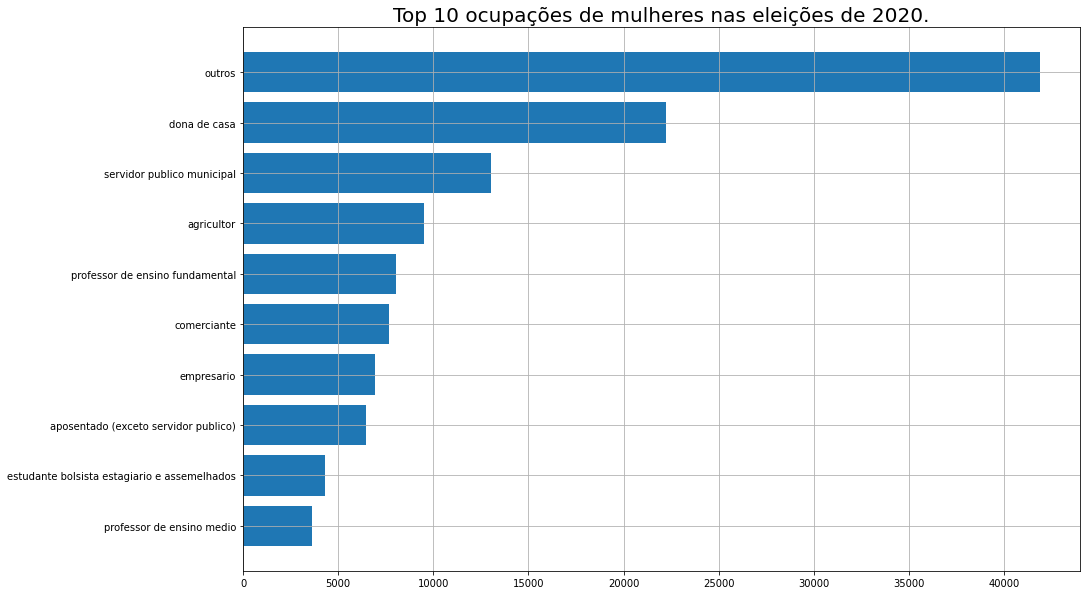

In [117]:
x = ocupacoes_fem[:10].sort_values(ascending=True)
y = ocupacoes_fem[:10].sort_values(ascending=True).keys()

plt.barh(y, x)
plt.grid()
plt.title(f'Top 10 ocupações de mulheres nas eleições de 2020.',
         fontsize='20', ha='center')
plt.rcParams["figure.figsize"] = [20,15]
plt.show()

## Agrupando por raça

In [118]:
racas = ['branca', 'parda', 'preta', 'indigena', 'amarela']
dic = {}

for ocupacao in df_infos['ocupacao'].sort_values().unique():
    dic[ocupacao] = {'ocupacao': ocupacao, 'branca': 0, 'parda':0, 'preta':0, 'indigena':0, 'amarela':0}
    if ocupacao in df_mulheres.keys():
        for raca in racas:
            if raca in df_mulheres[ocupacao].keys():
                dic[ocupacao][raca] = df_mulheres[ocupacao][raca]

output = pd.DataFrame()
for item in dic.keys():
    output = output.append(dic[item], ignore_index=True)
output = output[['ocupacao','amarela', 'branca', 'indigena', 'parda', 'preta']]
output.head()

,ocupacao,amarela,branca,indigena,parda,preta
0,administrador,6.00,1290.00,4.00,672.00,158.00
1,advogado,11.00,2099.00,4.00,623.00,201.00
2,agenciador de propaganda,0.00,13.00,0.00,4.00,1.00
3,agente administrativo,9.00,896.00,5.00,681.00,154.00
4,agente de saude e sanitarista,7.00,948.00,14.00,997.00,266.00


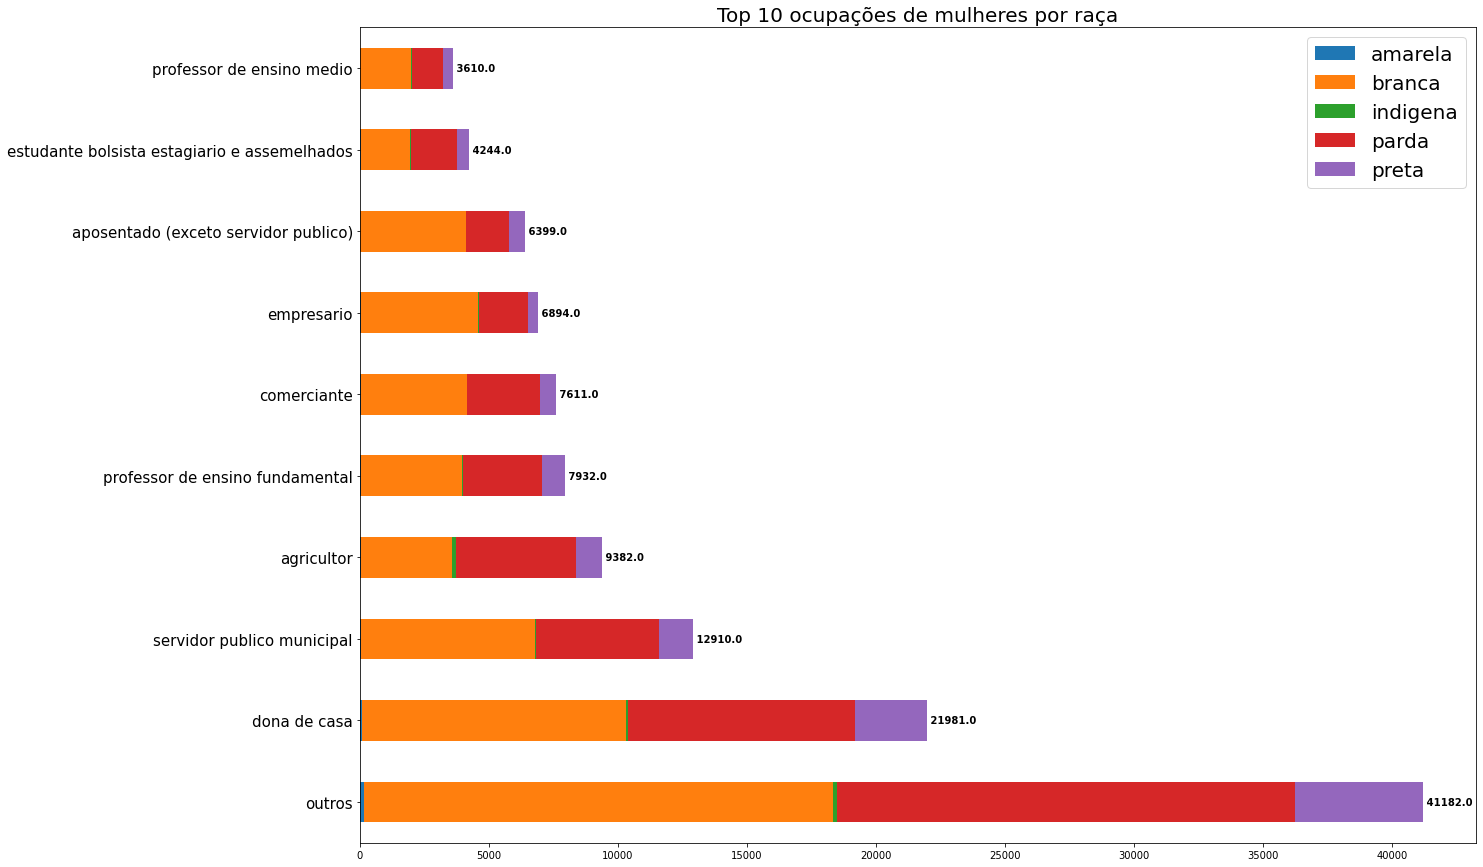

In [119]:
indices = output.sum(axis=1).sort_values(ascending=False).head(10).index.to_list()

ax = output.iloc[indices].plot.barh(stacked=True)
ax.set_yticklabels(output.iloc[indices]['ocupacao'])
plt.rcParams["figure.figsize"] = [20,15]
plt.title('Top 10 ocupações de mulheres por raça', fontsize=20)
plt.legend(prop={'size': 20})
ax.yaxis.set_tick_params(labelsize=15)

for i, v in enumerate(output.iloc[indices].sum(axis=1).to_list()):
    plt.text(
        v, i, " "+str(v), 
        color='black', 
        va='center', 
        fontweight='bold'
    )

# Candidaturas masculinas

In [120]:
df_homens = df_infos[df_infos['genero'] == 'masculino'].groupby(['ocupacao'])['raca'].value_counts()
df_homens.head()

ocupacao       raca    
administrador  branca      3154
               parda       1752
               preta        352
               amarela       27
               indigena      14
Name: raca, dtype: int64

## Ocupações masculinas

In [121]:
racas = ['branca', 'parda', 'preta', 'indigena', 'amarela']
dic = {}

for ocupacao in df_infos['ocupacao'].sort_values().unique():
    dic[ocupacao] = {'ocupacao': ocupacao, 'branca': 0, 'parda':0, 'preta':0, 'indigena':0, 'amarela':0}
    if ocupacao in df_homens.keys():
        for raca in racas:
            if raca in df_homens[ocupacao].keys():
                dic[ocupacao][raca] = df_homens[ocupacao][raca]

output = pd.DataFrame()
for item in dic.keys():
    output = output.append(dic[item], ignore_index=True)

output = output[['ocupacao','amarela', 'branca', 'indigena', 'parda', 'preta']]
output.head()

,ocupacao,amarela,branca,indigena,parda,preta
0,administrador,27.00,3154.00,14.00,1752.00,352.00
1,advogado,42.00,5295.00,9.00,2187.00,497.00
2,agenciador de propaganda,0.00,40.00,0.00,31.00,8.00
3,agente administrativo,6.00,912.00,11.00,999.00,271.00
4,agente de saude e sanitarista,3.00,442.00,34.00,899.00,219.00


In [123]:
ocupacoes_mas = df_infos[
    df_infos['genero'] == 'masculino'
]['ocupacao'].value_counts()

atributo = 'ocupacao'
d = []
soma = sum(ocupacoes_mas)
for key, value in ocupacoes_mas.items():
    proporcao = value/soma
    d.append([key, 100*proporcao, value])

df_ocupacao_mas = pd.DataFrame(d, columns=[atributo, 'percentual(%)', 'valor absoluto'])
df_ocupacao_mas.head()

,ocupacao,percentual(%),valor absoluto
0,outros,20.90,77451
1,agricultor,7.72,28604
2,empresario,7.15,26487
3,comerciante,6.23,23093
4,servidor publico municipal,6.06,22450


Ocupações que representam menos de 5% do total.

In [124]:
print('Ocupações de pessoas do genero masculino abaixo de 5% do total.')
df_ocupacao_mas[
    df_ocupacao_mas['percentual(%)'] < 5.0
]

Ocupações de pessoas do genero masculino abaixo de 5% do total.


,ocupacao,percentual(%),valor absoluto
6,aposentado (exceto servidor publico),3.52,13031
7,advogado,2.19,8105
8,trabalhador rural,1.68,6211
9,motorista de veiculos de transporte coletivo de passageiros,1.59,5895
10,motorista particular,1.55,5754
11,administrador,1.44,5349
12,professor de ensino medio,1.42,5269
13,motorista de veiculos de transporte de carga,1.39,5147
14,professor de ensino fundamental,1.25,4623
15,vigilante,1.18,4361


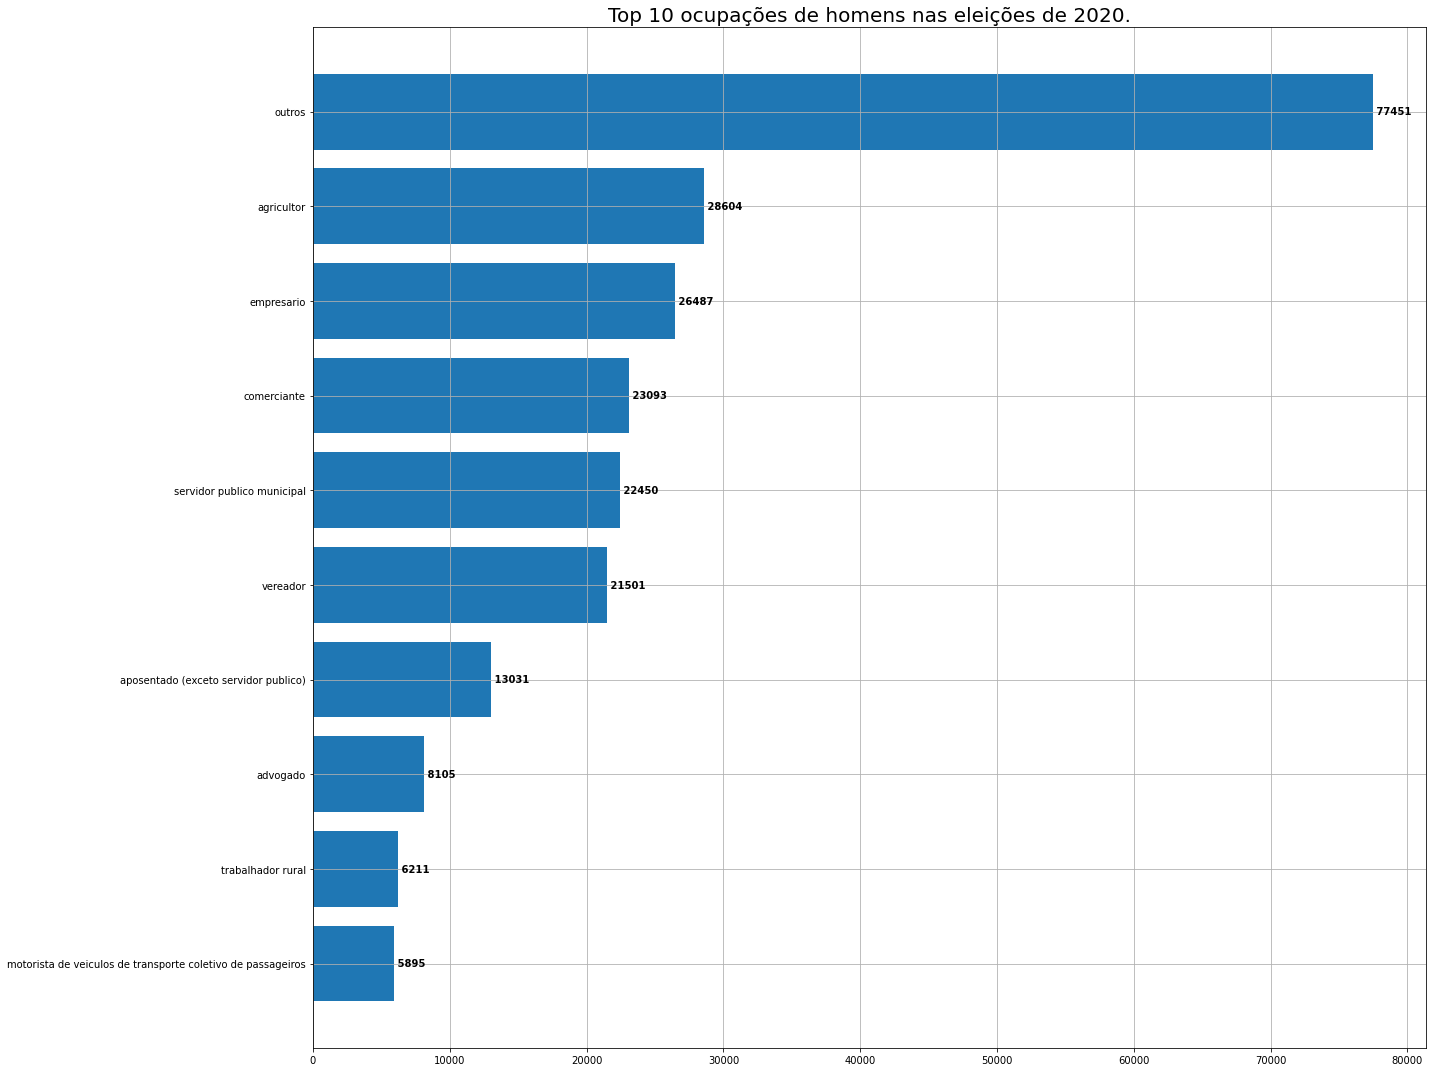

In [125]:
x = ocupacoes_mas[:10].sort_values(ascending=True)
y = ocupacoes_mas[:10].sort_values(ascending=True).keys()

plt.barh(y, x)
plt.grid()
plt.title(f'Top 10 ocupações de homens nas eleições de 2020.',
         fontsize='20', ha='center')
plt.tight_layout()

for i, v in enumerate(x):
    plt.text(
        v, i, " "+str(v), 
        color='black', 
        va='center', 
        fontweight='bold'
    )
    
plt.show()

## Agrupando por raça

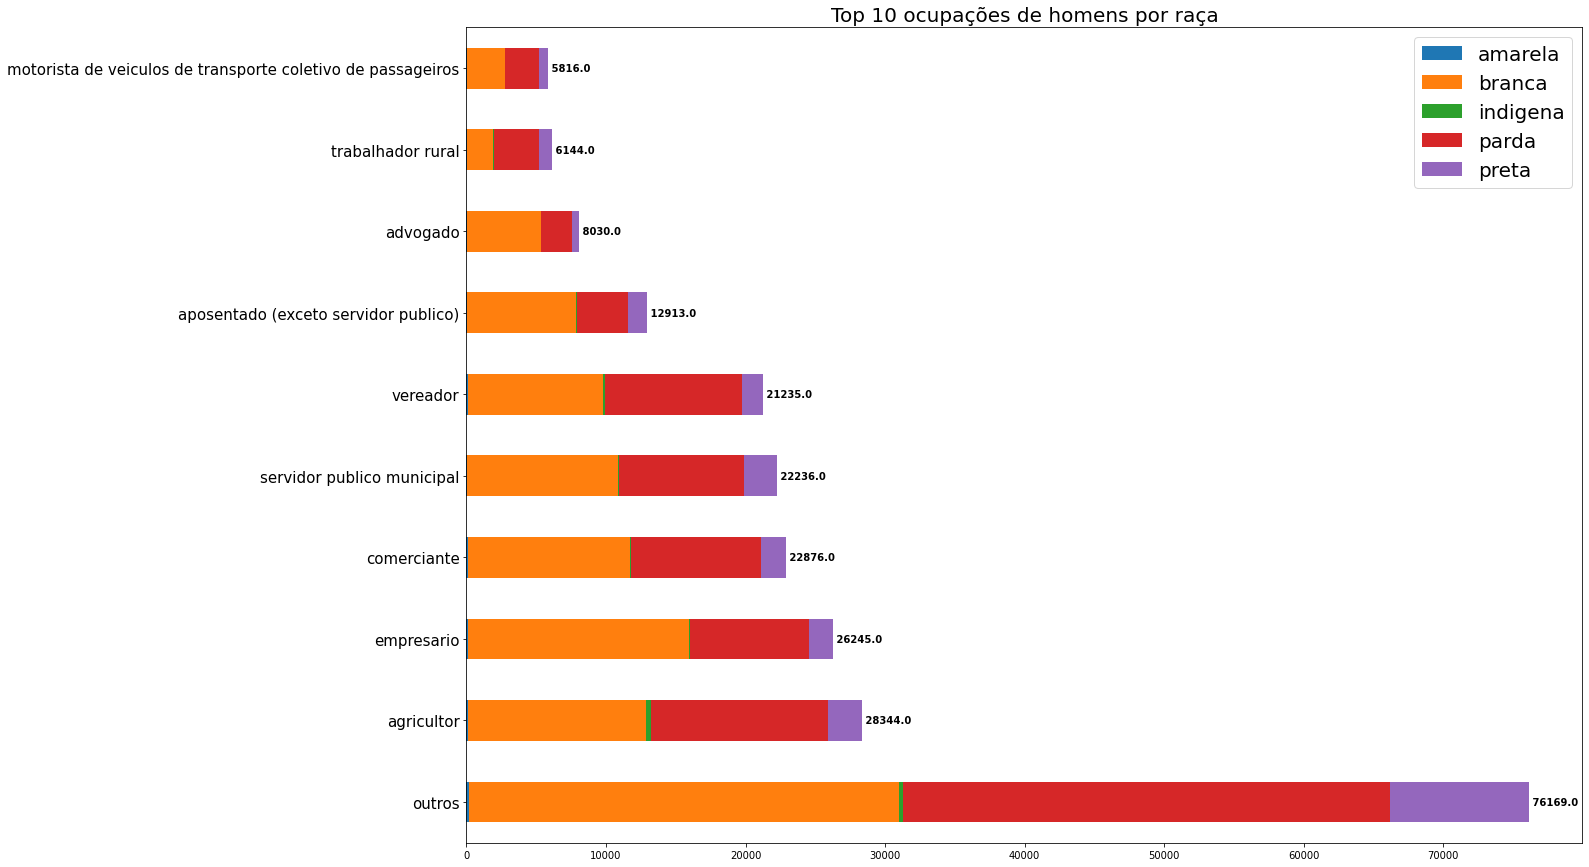

In [126]:
indices = output.sum(axis=1).sort_values(ascending=False).head(10).index.to_list()

ax = output.iloc[indices].plot.barh(stacked=True)
ax.set_yticklabels(output.iloc[indices]['ocupacao'])

plt.rcParams["figure.figsize"] = [20,15]
plt.title('Top 10 ocupações de homens por raça', fontsize=20)
plt.legend(prop={'size': 20})
ax.yaxis.set_tick_params(labelsize=15)

for i, v in enumerate(output.iloc[indices].sum(axis=1).to_list()):
    plt.text(
        v, i, " "+str(v), 
        color='black', 
        va='center', 
        fontweight='bold'
    )

# Partidos

Text(0.5, 1.0, 'Número de candidatos em cada partido.')

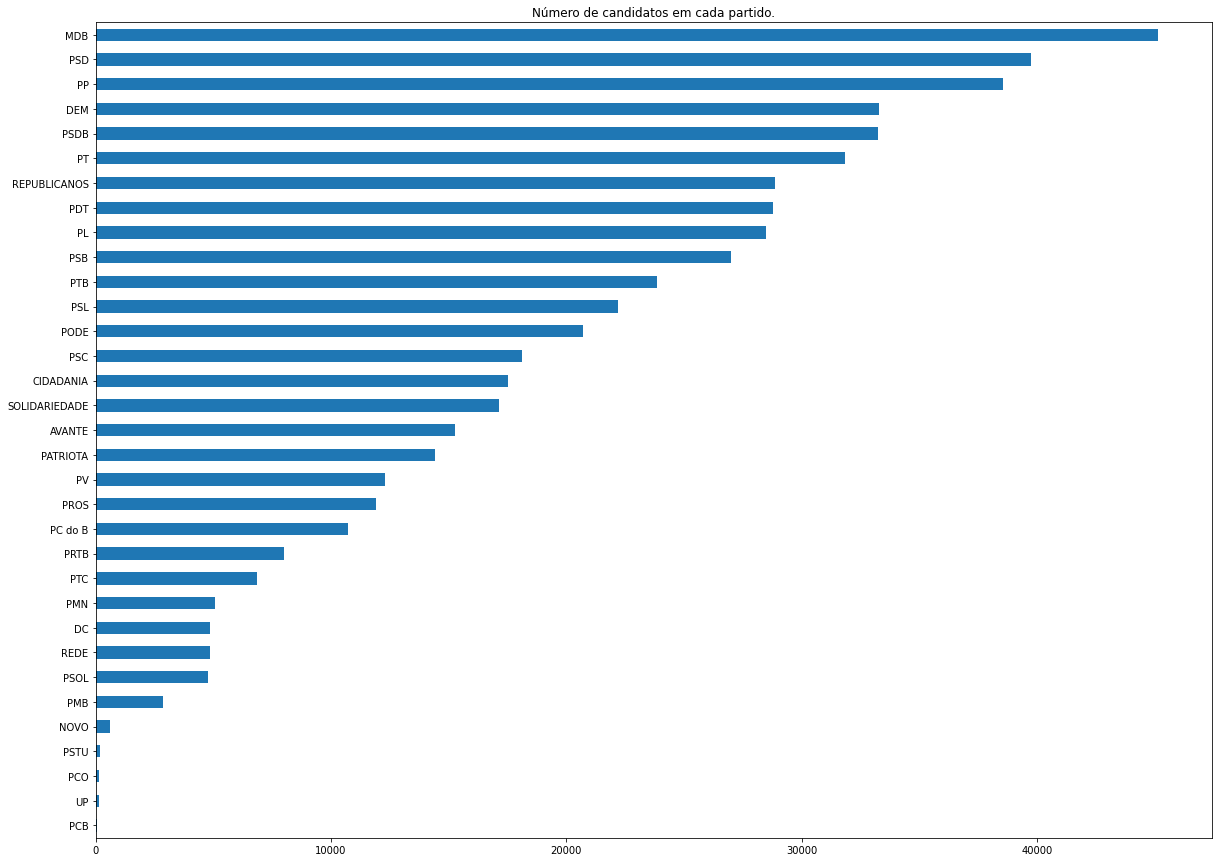

In [146]:
df_infos['sigla_partido'].value_counts(ascending=True).plot(kind='barh')

plt.title('Número de candidatos em cada partido.')

## Proporção de mulheres e homens em cada partido

Text(0.5, 1.0, 'Partidos e número de candidaturas por gênero.')

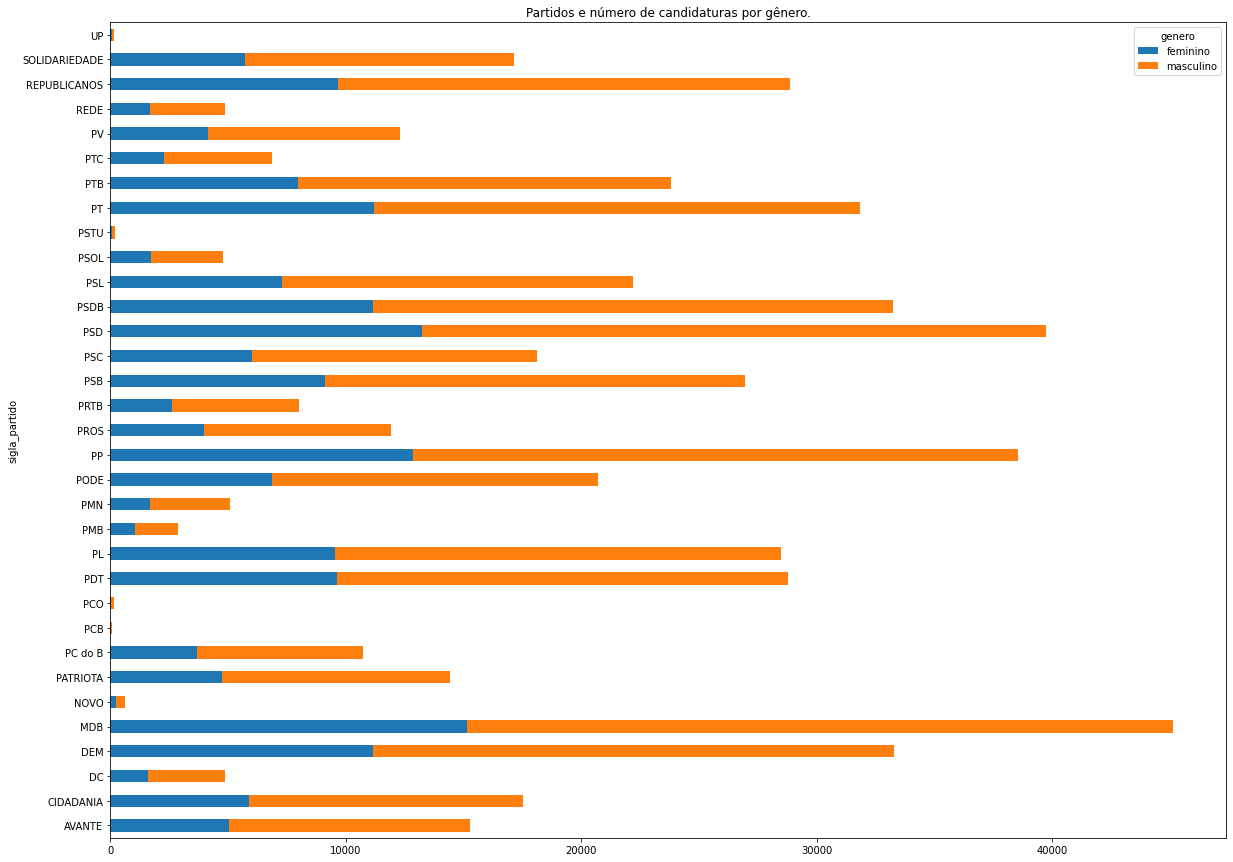

In [143]:
df_infos.groupby('sigla_partido')['genero'].value_counts(ascending=False).unstack().plot(kind='barh',stacked=True)

plt.title('Partidos e número de candidaturas por gênero.')

Text(0.5, 1.0, 'Cargos.')

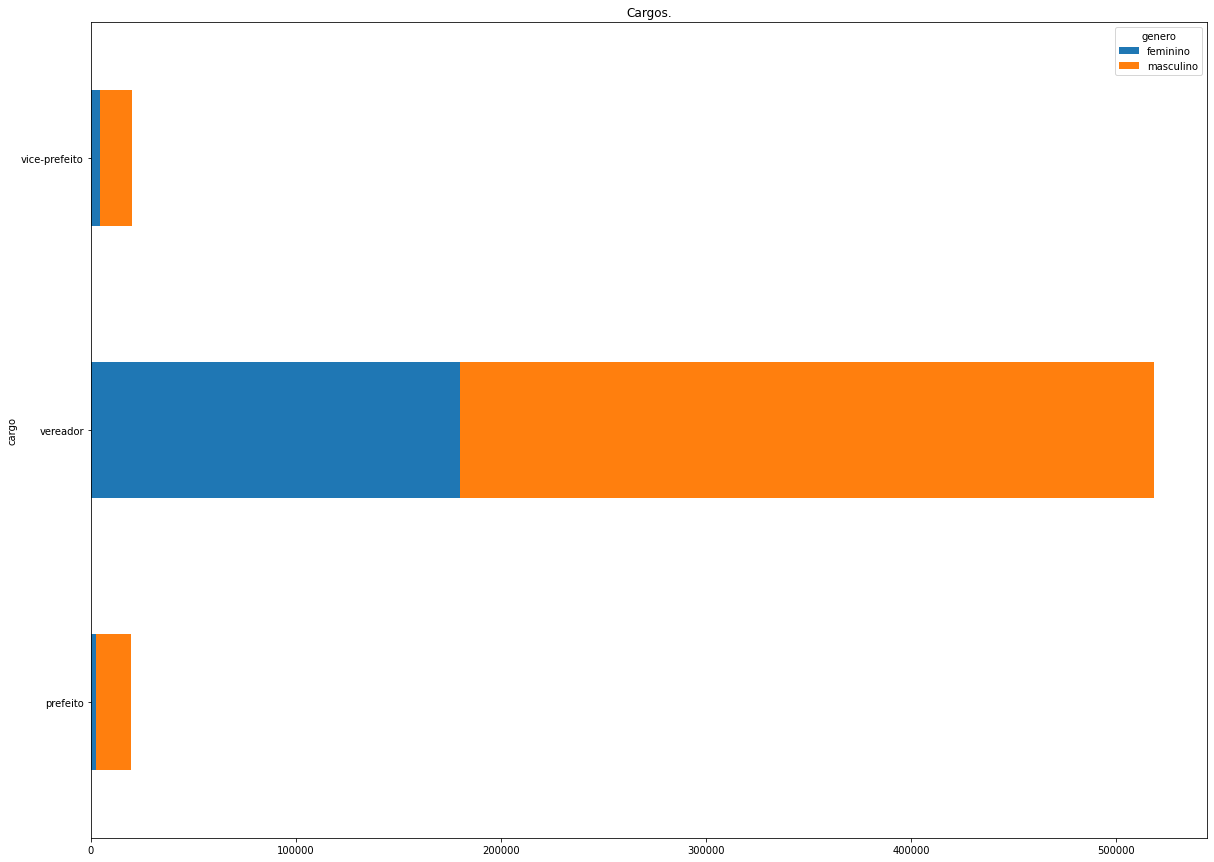

In [158]:
df_infos.groupby('cargo')['genero'].value_counts(ascending=False).unstack().plot(kind='barh',stacked=True)

plt.title('Cargos.')

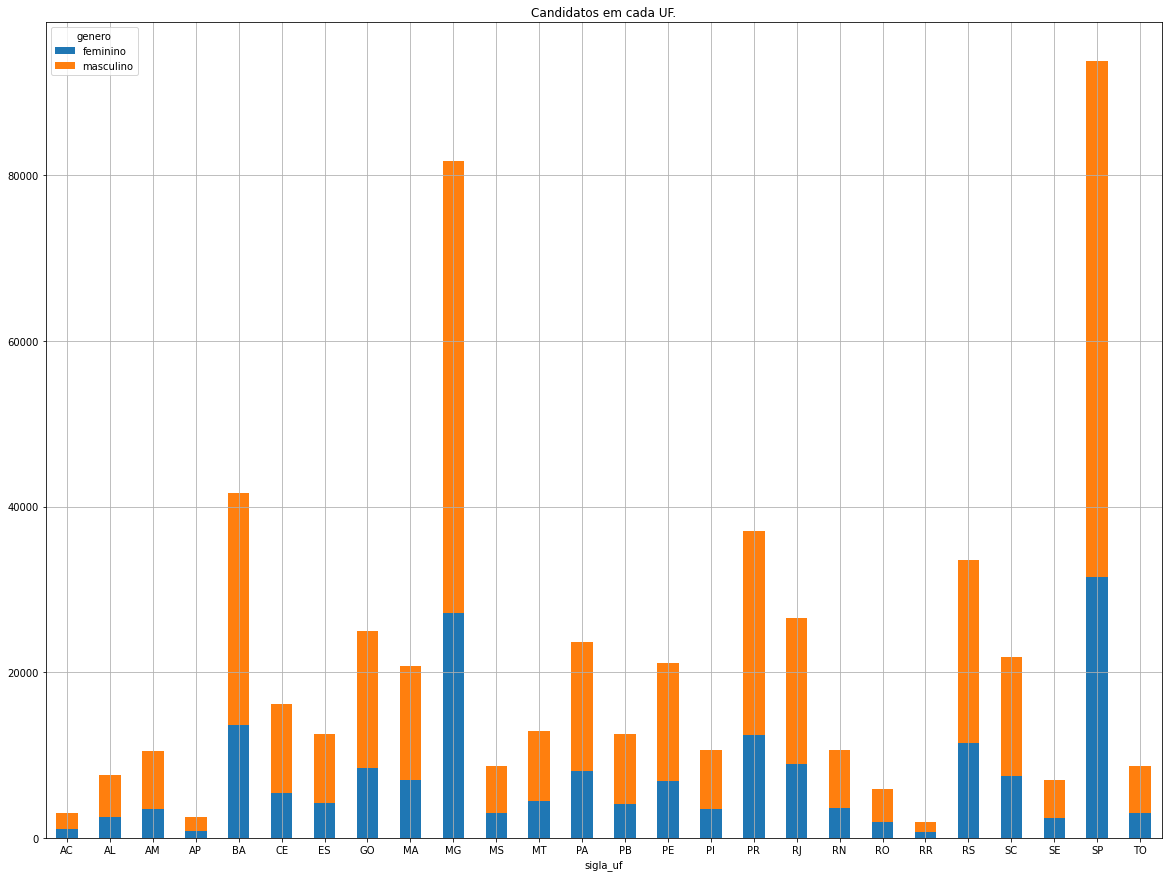

In [164]:
df_infos.groupby('sigla_uf')['genero'].value_counts(ascending=False).unstack().plot(kind='bar',stacked=True)

plt.title('Candidatos em cada UF.')
plt.xticks(rotation=0)
plt.grid()